In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import os
import requests
directory = 'data/'

In [2]:
for filename in os.listdir(directory):
     print(os.path.join(directory, filename))

data/alabama
data/IDS-DRSCountries_WLD_Country-SeriesMetadata.csv
data/IDS-DRSCountries_WLD_CountryMetadata.csv
data/IDS-DRSCountries_WLD_Data.csv
data/IDS-DRSCountries_WLD_Footnotes.csv
data/IDS-DRSCountries_WLD_SeriesMetadata.csv
data/IEA-EV-dataElectricity demandCarsHistorical_MoMo.csv
data/IEA-EV-dataEV chargersHistorical.csv
data/IEA-EV-dataEV sales shareCarsHistorical.csv
data/IEA-EV-dataEV stock shareCarsHistorical.csv
data/IEA-EV-dataEV stockCarsHistorical.csv
data/IEA-EV-dataOil displacementCarsHistorical_MoMo.csv
data/owid-covid-data.csv
data/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv
data/Provisional_COVID-19_Death_Counts_by_Week_Ending_Date_and_State.csv


In [25]:
df = pd.read_csv('data/Provisional_COVID-19_Death_Counts_by_Week_Ending_Date_and_State.csv')
df

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,07/29/2021,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,0.0,60175.0,98.0,4111.0,0.0,434.0,4545.0,NaN
1,07/29/2021,01/05/2020,01/11/2020,By Week,2020,NaN,2.0,01/11/2020,United States,1.0,60734.0,97.0,4153.0,1.0,475.0,4628.0,NaN
2,07/29/2021,01/12/2020,01/18/2020,By Week,2020,NaN,3.0,01/18/2020,United States,2.0,59362.0,98.0,4066.0,2.0,467.0,4533.0,NaN
3,07/29/2021,01/19/2020,01/25/2020,By Week,2020,NaN,4.0,01/25/2020,United States,2.0,59162.0,99.0,3915.0,0.0,500.0,4417.0,NaN
4,07/29/2021,01/26/2020,02/01/2020,By Week,2020,NaN,5.0,02/01/2020,United States,1.0,58834.0,99.0,3818.0,0.0,481.0,4300.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,07/29/2021,01/01/2020,07/24/2021,By Total,NaN,NaN,NaN,NaN,Washington,5854.0,97866.0,NaN,7745.0,3319.0,163.0,10436.0,NaN
5612,07/29/2021,01/01/2020,07/24/2021,By Total,NaN,NaN,NaN,NaN,West Virginia,2972.0,34997.0,NaN,3537.0,1481.0,69.0,5096.0,NaN
5613,07/29/2021,01/01/2020,07/24/2021,By Total,NaN,NaN,NaN,NaN,Wisconsin,8378.0,92923.0,NaN,6243.0,2716.0,174.0,12074.0,NaN
5614,07/29/2021,01/01/2020,07/24/2021,By Total,NaN,NaN,NaN,NaN,Wyoming,689.0,8276.0,NaN,717.0,318.0,11.0,1098.0,NaN


<AxesSubplot:xlabel='State'>

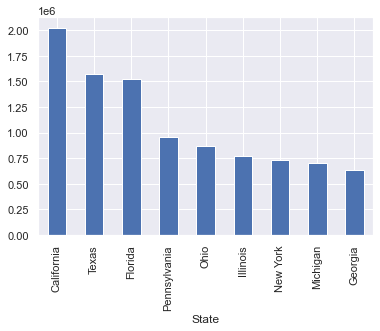

In [17]:
sns.set()
df.groupby('State')['Total Deaths'].sum().sort_values(ascending=False)[1:10].plot(kind='bar')

In [13]:
df[df['State']!='United States'].groupby('State')['Total Deaths'].sum().sort_values(ascending=False).sum()

20793325.0

In [9]:
df['State'].value_counts()

Puerto Rico             104
Mississippi             104
California              104
New Hampshire           104
Tennessee               104
Alabama                 104
New York                104
Wisconsin               104
New York City           104
United States           104
Arkansas                104
South Carolina          104
Wyoming                 104
Idaho                   104
Colorado                104
Kentucky                104
Hawaii                  104
Montana                 104
Iowa                    104
Texas                   104
District of Columbia    104
Rhode Island            104
Pennsylvania            104
Utah                    104
Maryland                104
Washington              104
Oregon                  104
South Dakota            104
Connecticut             104
Illinois                104
Nebraska                104
Delaware                104
Indiana                 104
New Jersey              104
Virginia                104
North Carolina      

In [21]:
df2 = pd.read_csv('data/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')

In [34]:
df2['Data As Of'] = pd.to_datetime(df2['Data As Of'])
df2['Start Date'] = pd.to_datetime(df2['Start Date'])
df2['End Date'] = pd.to_datetime(df2['End Date'])
df2

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,2021-07-28,2020-01-01,2021-07-24,By Total,NaN,NaN,United States,All Sexes,All Ages,603504.0,5133751.0,543345.0,296653.0,9203.0,858110.0,NaN
1,2021-07-28,2020-01-01,2021-07-24,By Total,NaN,NaN,United States,All Sexes,Under 1 year,84.0,29112.0,311.0,12.0,22.0,405.0,NaN
2,2021-07-28,2020-01-01,2021-07-24,By Total,NaN,NaN,United States,All Sexes,0-17 years,340.0,51213.0,831.0,65.0,187.0,1293.0,NaN
3,2021-07-28,2020-01-01,2021-07-24,By Total,NaN,NaN,United States,All Sexes,1-4 years,40.0,5314.0,167.0,6.0,65.0,266.0,NaN
4,2021-07-28,2020-01-01,2021-07-24,By Total,NaN,NaN,United States,All Sexes,5-14 years,117.0,8518.0,240.0,27.0,79.0,409.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60583,2021-07-28,2021-07-01,2021-07-24,By Month,2021.0,7.0,Puerto Rico,Female,50-64 years,NaN,28.0,NaN,NaN,0.0,NaN,One or more data cells have counts between 1-9...
60584,2021-07-28,2021-07-01,2021-07-24,By Month,2021.0,7.0,Puerto Rico,Female,55-64 years,NaN,27.0,NaN,NaN,0.0,NaN,One or more data cells have counts between 1-9...
60585,2021-07-28,2021-07-01,2021-07-24,By Month,2021.0,7.0,Puerto Rico,Female,65-74 years,NaN,26.0,NaN,NaN,0.0,NaN,One or more data cells have counts between 1-9...
60586,2021-07-28,2021-07-01,2021-07-24,By Month,2021.0,7.0,Puerto Rico,Female,75-84 years,0.0,58.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1-9...


In [27]:
df2['Age Group'].value_counts()

0-17 years           3564
40-49 years          3564
45-54 years          3564
25-34 years          3564
50-64 years          3564
5-14 years           3564
65-74 years          3564
35-44 years          3564
1-4 years            3564
85 years and over    3564
30-39 years          3564
18-29 years          3564
All Ages             3564
Under 1 year         3564
75-84 years          3564
15-24 years          3564
55-64 years          3564
Name: Age Group, dtype: int64

In [37]:
df2['State'].value_counts()

Colorado                1122
Alabama                 1122
Indiana                 1122
Vermont                 1122
Wyoming                 1122
Utah                    1122
North Carolina          1122
Michigan                1122
Louisiana               1122
Massachusetts           1122
Missouri                1122
South Dakota            1122
New Hampshire           1122
Wisconsin               1122
Nebraska                1122
United States           1122
Idaho                   1122
Rhode Island            1122
Alaska                  1122
Ohio                    1122
Illinois                1122
Connecticut             1122
New York City           1122
Montana                 1122
Washington              1122
Florida                 1122
Georgia                 1122
Arkansas                1122
Oregon                  1122
Nevada                  1122
Delaware                1122
New Mexico              1122
Kansas                  1122
California              1122
Tennessee     

In [36]:
df2['Group'].value_counts()

By Month    52326
By Year      5508
By Total     2754
Name: Group, dtype: int64

In [35]:
df2['Start Date'].sort_values().unique()

array(['2020-01-01T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-04-01T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-05-01T00:00:00.000000000', '2021-06-01T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [24]:
df2['Footnote'].value_counts()

One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.    40455
Name: Footnote, dtype: int64

In [41]:
df3 = pd.read_csv('data/owid-covid-data.csv')
df3['date'] = pd.to_datetime(df3['date'])

In [43]:
df3['location'].value_counts()

Argentina                          575
Peru                               575
Mexico                             575
Thailand                           572
Taiwan                             560
                                  ... 
Tuvalu                              50
Pitcairn                            43
Niue                                16
Bonaire Sint Eustatius and Saba      1
Turkmenistan                         1
Name: location, Length: 231, dtype: int64

In [53]:
df3['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [60]:
US = df3[df3['location'] == 'United States']
US = US.sort_values('date')
US

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
100188,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
100189,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
100190,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
100191,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
100192,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100737,USA,North America,United States,2021-07-24,34428075.0,27395.0,51451.857,610625.0,115.0,274.286,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
100738,USA,North America,United States,2021-07-25,34444083.0,16008.0,52017.571,610681.0,56.0,263.000,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
100739,USA,North America,United States,2021-07-26,34533179.0,89096.0,57301.143,610952.0,271.0,271.571,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
100740,USA,North America,United States,2021-07-27,34603919.0,70740.0,61306.429,611414.0,462.0,296.714,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN


In [61]:
US['date'].unique()

array(['2020-01-22T00:00:00.000000000', '2020-01-23T00:00:00.000000000',
       '2020-01-24T00:00:00.000000000', '2020-01-25T00:00:00.000000000',
       '2020-01-26T00:00:00.000000000', '2020-01-27T00:00:00.000000000',
       '2020-01-28T00:00:00.000000000', '2020-01-29T00:00:00.000000000',
       '2020-01-30T00:00:00.000000000', '2020-01-31T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-02-02T00:00:00.000000000',
       '2020-02-03T00:00:00.000000000', '2020-02-04T00:00:00.000000000',
       '2020-02-05T00:00:00.000000000', '2020-02-06T00:00:00.000000000',
       '2020-02-07T00:00:00.000000000', '2020-02-08T00:00:00.000000000',
       '2020-02-09T00:00:00.000000000', '2020-02-10T00:00:00.000000000',
       '2020-02-11T00:00:00.000000000', '2020-02-12T00:00:00.000000000',
       '2020-02-13T00:00:00.000000000', '2020-02-14T00:00:00.000000000',
       '2020-02-15T00:00:00.000000000', '2020-02-16T00:00:00.000000000',
       '2020-02-17T00:00:00.000000000', '2020-02-18

In [62]:
US.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

<ipython-input-69-8e81e968a5f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccines.dropna(inplace=True)


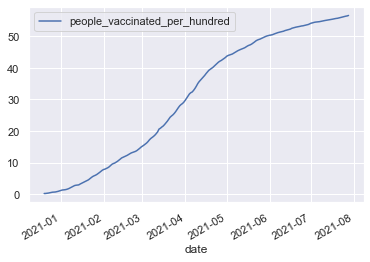

In [69]:
vaccines = US[['date','people_vaccinated_per_hundred']]
vaccines.dropna(inplace=True)
vaccines.set_index('date', inplace=True)
vaccines.plot()
plt.show()

data/IDS-DRSCountries_WLD_Country-SeriesMetadata.csv

data/IDS-DRSCountries_WLD_CountryMetadata.csv

data/IDS-DRSCountries_WLD_Data.csv 

data/IDS-DRSCountries_WLD_Footnotes.csv 

data/IDS-DRSCountries_WLD_SeriesMetadata.csv

In [74]:
df3 = pd.read_csv('data/IDS-DRSCountries_WLD_Country-SeriesMetadata.csv')
df3

,Type,Country Code,Series Code,Description
0,Country-Series,Afghanistan (AFG),"Foreign direct investment, net inflows in repo...",Data on Foreign Direct Investment are based on...
1,Country-Series,Afghanistan (AFG),"External debt stocks, total (DOD, current US$)...",Long-term public and publicly guaranteed and l...
2,Country-Series,Angola (AGO),"Foreign direct investment, net inflows in repo...",Data on Foreign Direct Investment are based on...
3,Country-Series,Angola (AGO),"External debt stocks, total (DOD, current US$)...",Long-term public and publicly guaranteed debt ...
4,Country-Series,Albania (ALB),"Foreign direct investment, net inflows in repo...",Data on Foreign Direct Investment are based on...
...,...,...,...,...
254,Country-Series,South Africa (ZAF),"External debt stocks, total (DOD, current US$)...",Long-term public and publicly guaranteed and l...
255,Country-Series,Zambia (ZMB),"Foreign direct investment, net inflows in repo...",Data on Foreign Direct Investment are based on...
256,Country-Series,Zambia (ZMB),"External debt stocks, total (DOD, current US$)...",Long-term public and publicly guaranteed debt ...
257,Country-Series,Zimbabwe (ZWE),"Foreign direct investment, net inflows in repo...",Data on Foreign Direct Investment are based on...


In [75]:
df4 = pd.read_csv('data/IDS-DRSCountries_WLD_CountryMetadata.csv')
df4

,Code,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,...,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name
0,AFG,Islamic State of Afghanistan,Low income,South Asia,IDA,HIPC,Afghan afghani,1979,"Demographic and Health Survey, 2015",NaN,...,"Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,2000.0,AF,AF,Afghanistan,Afghanistan
1,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,IBRD,NaN,Albanian lek,2011,"Demographic and Health Survey, 2017/18",NaN,...,Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,2006.0,AL,AL,Albania,Albania
2,DZA,People's Democratic Republic of Algeria,Lower middle income,Middle East & North Africa,IBRD,NaN,Algerian dinar,2008,"Multiple Indicator Cluster Survey, 2018/2019",NaN,...,"Integrated household survey (IHS), 2011",NaN,NaN,2010.0,2017.0,2012.0,DZ,DZ,Algeria,Algeria
3,AGO,People's Republic of Angola,Lower middle income,Sub-Saharan Africa,IBRD,NaN,Angolan kwanza,2014,"Demographic and Health Survey, 2015/16",NaN,...,"Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2017.0,2005.0,AO,AO,Angola,Angola
4,ARG,Argentine Republic,Upper middle income,Latin America & Caribbean,IBRD,NaN,Argentine peso,2010,"Multiple Indicator Cluster Survey, 2011/12",NaN,...,"Integrated household survey (IHS), 2016",Yes,2008,2002.0,2017.0,2011.0,AR,AR,Argentina,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,VEN,República Bolivariana de Venezuela,Upper middle income,Latin America & Caribbean,IBRD,NaN,Venezuelan bolivar fuerte,2011,"Multiple Indicator Cluster Survey, 2000",NaN,...,"Integrated household survey (IHS), 2015",NaN,2008,1998.0,2016.0,2007.0,VE,VE,"Venezuela, RB",Venezuela
129,VNM,Socialist Republic of Vietnam,Lower middle income,East Asia & Pacific,IBRD,NaN,Vietnamese dong,2019,"Multiple Indicator Cluster Survey, 2013/14",NaN,...,"Integrated household survey (IHS), 2016",Yes,2016,2013.0,2017.0,2005.0,VN,VN,Vietnam,Vietnam
130,YEM,Republic of Yemen,Low income,Middle East & North Africa,IDA,NaN,Yemeni rial,2004,"Demographic and Health Survey, 2013",NaN,...,"Expenditure survey/budget survey (ES/BS), 2014",NaN,NaN,2012.0,2017.0,2005.0,YE,RY,"Yemen, Rep.",Yemen
131,ZMB,Republic of Zambia,Lower middle income,Sub-Saharan Africa,IDA,HIPC,New Zambian kwacha,2010,"Demographic and Health Survey, 2018",National accounts data were rebased to reflect...,...,"Integrated household survey (IHS), 2015",NaN,NaN,1994.0,2017.0,2002.0,ZM,ZM,Zambia,Zambia


In [77]:
df5 = pd.read_csv('data/IDS-DRSCountries_WLD_Data.csv')
df5

,Country Name,Country Code,Counterpart-Area Name,Counterpart-Area Code,Series Name,Series Code,1970,1971,1972,1973,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
0,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.DPPG,NaN,NaN,NaN,NaN,...,NaN,17.9041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.OFFT,NaN,NaN,NaN,NaN,...,NaN,17.9041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.PRVT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.DPPG,NaN,NaN,NaN,NaN,...,NaN,73.0790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.OFFT,NaN,NaN,NaN,NaN,...,NaN,73.0790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66104,Data from database: International Debt Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df5['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize',
       'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Djibouti', 'Dominica',
       'Dominican Republic',
       'East Asia & Pacific (excluding high income)', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Eritrea', 'Eswatini',
       'Ethiopia', 'Europe & Central Asia (excluding high income)',
       'Fiji', 'Gabon', 'Gambia, The', 'Georgia', 'Ghana', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'IDA only', 'India', 'Indonesia', 'Iran, Islamic Rep.',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo',
       'Kyrgyz Repu

In [79]:
df5[df5['Country Name'] == 'China']

,Country Name,Country Code,Counterpart-Area Name,Counterpart-Area Code,Series Name,Series Code,1970,1971,1972,1973,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
11928,China,CHN,World,WLD,Average grace period on new external debt comm...,DT.GPA.DPPG,NaN,NaN,NaN,NaN,...,9.865800e+00,1.378330e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11929,China,CHN,World,WLD,Average grace period on new external debt comm...,DT.GPA.OFFT,NaN,NaN,NaN,NaN,...,5.855600e+00,6.404700e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11930,China,CHN,World,WLD,Average grace period on new external debt comm...,DT.GPA.PRVT,NaN,NaN,NaN,NaN,...,1.010270e+01,1.414020e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11931,China,CHN,World,WLD,Average grant element on new external debt com...,DT.GRE.DPPG,NaN,NaN,NaN,NaN,...,2.201340e+01,-1.553627e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11932,China,CHN,World,WLD,Average grant element on new external debt com...,DT.GRE.OFFT,NaN,NaN,NaN,NaN,...,1.866930e+01,2.998370e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12420,China,CHN,World,WLD,"Undisbursed external debt, official creditors ...",DT.UND.OFFT.CD,NaN,NaN,NaN,NaN,...,1.449217e+10,1.358824e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12421,China,CHN,World,WLD,"Undisbursed external debt, private creditors (...",DT.UND.PRVT.CD,NaN,NaN,NaN,NaN,...,7.515865e+09,1.010355e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12422,China,CHN,World,WLD,"Undisbursed external debt, total (UND, current...",DT.UND.DPPG.CD,NaN,NaN,NaN,NaN,...,2.200803e+10,1.459860e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12423,China,CHN,World,WLD,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,NaN,NaN,NaN,NaN,...,9.721171e+09,9.665492e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df = pd.read_csv('data/IEA-EV-dataElectricity demandCarsHistorical_MoMo.csv')
df

,region,category,parameter,mode,powertrain,year,unit,value
0,China,Historical_MoMo,Electricity demand,Cars,BEV,2015,GWh,253.848999
1,China,Historical_MoMo,Electricity demand,Cars,PHEV,2015,GWh,58.645000
2,China,Historical_MoMo,Electricity demand,Cars,BEV,2016,GWh,694.916992
3,China,Historical_MoMo,Electricity demand,Cars,PHEV,2016,GWh,173.917007
4,China,Historical_MoMo,Electricity demand,Cars,BEV,2017,GWh,1397.156982
5,China,Historical_MoMo,Electricity demand,Cars,PHEV,2017,GWh,290.506989
6,China,Historical_MoMo,Electricity demand,Cars,BEV,2018,GWh,2621.381104
7,China,Historical_MoMo,Electricity demand,Cars,PHEV,2018,GWh,569.085022
8,China,Historical_MoMo,Electricity demand,Cars,BEV,2019,GWh,3873.105957
9,China,Historical_MoMo,Electricity demand,Cars,PHEV,2019,GWh,806.570984


In [3]:
for filename in os.listdir('data/alabama/'):
     print(os.path.join('data/alabama/', filename))

data/alabama/agencies.CSV
data/alabama/NIBRS_ACTIVITY_TYPE.CSV
data/alabama/NIBRS_AGE.CSV
data/alabama/NIBRS_ARRESTEE.CSV
data/alabama/NIBRS_ARRESTEE_WEAPON.CSV
data/alabama/NIBRS_ARREST_TYPE.CSV
data/alabama/NIBRS_ASSIGNMENT_TYPE.CSV
data/alabama/NIBRS_BIAS_LIST.CSV
data/alabama/NIBRS_BIAS_MOTIVATION.CSV
data/alabama/NIBRS_CIRCUMSTANCES.CSV
data/alabama/NIBRS_CLEARED_EXCEPT.CSV
data/alabama/NIBRS_CRIMINAL_ACT.CSV
data/alabama/NIBRS_CRIMINAL_ACT_TYPE.CSV
data/alabama/nibrs_diagram.pdf
data/alabama/NIBRS_DRUG_MEASURE_TYPE.CSV
data/alabama/NIBRS_ETHNICITY.CSV
data/alabama/NIBRS_incident.CSV
data/alabama/NIBRS_INJURY.CSV
data/alabama/NIBRS_JUSTIFIABLE_FORCE.CSV
data/alabama/NIBRS_LOCATION_TYPE.CSV
data/alabama/NIBRS_month.CSV
data/alabama/NIBRS_OFFENDER.CSV
data/alabama/NIBRS_OFFENSE.CSV
data/alabama/NIBRS_OFFENSE_TYPE.CSV
data/alabama/NIBRS_PROPERTY.CSV
data/alabama/NIBRS_PROPERTY_DESC.CSV
data/alabama/NIBRS_PROP_DESC_TYPE.CSV
data/alabama/NIBRS_PROP_LOSS_TYPE.CSV
data/alabama/NIBRS_RELA

In [7]:
base = 'https://api.usa.gov/crime/fbi/sapi/'

In [8]:
data = requests.get(base+'/api/nibrs/{120}/offense/regions/{MA}/{count}')

In [9]:
data

<Response [403]>

In [10]:
for filename in os.listdir('data/canada/'):
     print(os.path.join('data/canada/', filename))

data/canada/35100177.csv
data/canada/35100177_MetaData.csv


In [12]:
df = pd.read_csv('data/canada/35100177.csv')

C:\Users\Caleb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0                                           Actual incidents
1                                Rate per 100,000 population
2                                  Percentage change in rate
3                                              Total cleared
4                                          Cleared by charge
                                 ...                        
4053535    Rate, adult charged per 100,000 population age...
4053536                                 Total, youth charged
4053537    Rate, youth charged per 100,000 population age...
4053538                             Total, youth not charged
4053539    Rate, youth not charged per 100,000 population...
Name: Statistics, Length: 4053540, dtype: object

In [13]:
df

,REF_DATE,GEO,DGUID,Violations,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1998,Canada,2016A000011124,"Total, all violations [0]",Actual incidents,Number,223,units,0,v44348247,1.1.1,2688540.00,NaN,NaN,NaN,0
1,1998,Canada,2016A000011124,"Total, all violations [0]","Rate per 100,000 population",Rate,257,units,0,v44396346,1.1.2,8915.12,NaN,NaN,NaN,2
2,1998,Canada,2016A000011124,"Total, all violations [0]",Percentage change in rate,Percent,239,units,0,v44391402,1.1.3,NaN,..,NaN,NaN,2
3,1998,Canada,2016A000011124,"Total, all violations [0]",Total cleared,Number,223,units,0,v44327422,1.1.4,1073453.00,NaN,NaN,NaN,0
4,1998,Canada,2016A000011124,"Total, all violations [0]",Cleared by charge,Number,223,units,0,v44327628,1.1.5,705133.00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053535,2020,Nunavut [62],2016A000262,Other federal statutes [6900],"Rate, adult charged per 100,000 population age...",Rate,257,units,0,v44384894,42.216.10,0.00,NaN,NaN,NaN,2
4053536,2020,Nunavut [62],2016A000262,Other federal statutes [6900],"Total, youth charged",Number,223,units,0,v44367300,42.216.11,0.00,NaN,NaN,NaN,0
4053537,2020,Nunavut [62],2016A000262,Other federal statutes [6900],"Rate, youth charged per 100,000 population age...",Rate,257,units,0,v44400987,42.216.12,0.00,NaN,NaN,NaN,2
4053538,2020,Nunavut [62],2016A000262,Other federal statutes [6900],"Total, youth not charged",Number,223,units,0,v53098849,42.216.13,0.00,NaN,NaN,NaN,0


In [15]:
df['Statistics'].unique()

array(['Actual incidents', 'Rate per 100,000 population',
       'Percentage change in rate', 'Total cleared', 'Cleared by charge',
       'Cleared otherwise', 'Total, persons charged',
       'Rate, total persons charged per 100,000 population aged 12 years and over',
       'Total, adult charged',
       'Rate, adult charged per 100,000 population aged 18 years and over',
       'Total, youth charged',
       'Rate, youth charged per 100,000 population aged 12 to 17 years',
       'Total, youth not charged',
       'Rate, youth not charged per 100,000 population aged 12 to 17 years',
       'Unfounded incidents', 'Percent unfounded'], dtype=object)

In [18]:
df['Violations'].unique()

array(['Total, all violations [0]',
       'Total, all Criminal Code violations (including traffic) [25]',
       'Total, all Criminal Code violations (excluding traffic) [50]',
       'Total violent Criminal Code violations [100]', 'Homicide [110]',
       'Murder, first degree [1110]', 'Murder, second degree [1120]',
       'Manslaughter [1130]', 'Infanticide [1140]',
       'Total other violations causing death [120]',
       'Criminal negligence causing death [1150]',
       'Other related violations causing death [1160]',
       'Attempted murder [1210]',
       'Sexual assault, level 3, aggravated [1310]',
       'Sexual assault, level 2, weapon or bodily harm [1320]',
       'Sexual assault, level 1 [1330]',
       'Total sexual violations against children [130]',
       'Sexual interference [1345]',
       'Assault, level 3, aggravated [1410]',
       'Assault, level 2, weapon or bodily harm [1420]',
       'Assault, level 1 [1430]',
       'Total assaults against a peace offic

In [26]:
print(df['GEO'].unique())
print(len(df['GEO'].unique()))

['Canada' 'Newfoundland and Labrador [10]'
 "St. John's, Newfoundland and Labrador [10001]"
 'Prince Edward Island [11]' 'Nova Scotia [12]'
 'Halifax, Nova Scotia [12205]' 'New Brunswick [13]'
 'Moncton, New Brunswick [13305]' 'Saint John, New Brunswick [13310]'
 'Quebec [24]' 'Saguenay, Quebec [24408]' 'Québec, Quebec [24421]'
 'Sherbrooke, Quebec [24433]' 'Trois-Rivières, Quebec [24442]'
 'Montréal, Quebec [24462]' 'Ottawa-Gatineau, Quebec part [24505]'
 'Ontario [35]' 'Ottawa-Gatineau, Ontario/Quebec [24505/35505]'
 'Ottawa-Gatineau, Ontario part [35505]' 'Kingston, Ontario [35521]'
 'Peterborough, Ontario [35529]' 'Toronto, Ontario [35535]'
 'Hamilton, Ontario [35537]' 'St.Catharines-Niagara, Ontario [35539]'
 'Kitchener-Cambridge-Waterloo, Ontario [35541]'
 'Brantford, Ontario [35543]' 'Guelph, Ontario [35550]'
 'London, Ontario [35555]' 'Windsor, Ontario [35559]'
 'Barrie, Ontario [35568]' 'Greater Sudbury, Ontario [35580]'
 'Thunder Bay, Ontario [35595]' 'Manitoba [46]'
 'Winnip

In [21]:
sexual_assault = df[df['Violations'].isin(['Sexual assault, level 3, aggravated [1310]',
       'Sexual assault, level 2, weapon or bodily harm [1320]',
       'Sexual assault, level 1 [1330]'])]

In [24]:
sexual_assault_2020 = sexual_assault[sexual_assault['REF_DATE']==2020]
sexual_assault_2020

,REF_DATE,GEO,DGUID,Violations,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
3804964,2020,Canada,2016A000011124,"Sexual assault, level 3, aggravated [1310]",Actual incidents,Number,223,units,0,v44349809,1.14.1,136.00,NaN,NaN,NaN,0
3804965,2020,Canada,2016A000011124,"Sexual assault, level 3, aggravated [1310]","Rate per 100,000 population",Rate,257,units,0,v44389864,1.14.2,0.36,NaN,NaN,NaN,2
3804966,2020,Canada,2016A000011124,"Sexual assault, level 3, aggravated [1310]",Percentage change in rate,Percent,239,units,0,v44338523,1.14.3,7.62,NaN,NaN,NaN,2
3804967,2020,Canada,2016A000011124,"Sexual assault, level 3, aggravated [1310]",Unfounded incidents,Number,223,units,0,v1000149337,1.14.15,7.00,NaN,NaN,NaN,0
3804968,2020,Canada,2016A000011124,"Sexual assault, level 3, aggravated [1310]",Percent unfounded,Percent,239,units,0,v1000149338,1.14.16,4.90,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4048831,2020,Nunavut [62],2016A000262,"Sexual assault, level 1 [1330]","Rate, adult charged per 100,000 population age...",Rate,257,units,0,v44361373,42.16.10,450.20,NaN,NaN,NaN,2
4048832,2020,Nunavut [62],2016A000262,"Sexual assault, level 1 [1330]","Total, youth charged",Number,223,units,0,v44388888,42.16.11,13.00,NaN,NaN,NaN,0
4048833,2020,Nunavut [62],2016A000262,"Sexual assault, level 1 [1330]","Rate, youth charged per 100,000 population age...",Rate,257,units,0,v44347911,42.16.12,301.97,NaN,NaN,NaN,2
4048834,2020,Nunavut [62],2016A000262,"Sexual assault, level 1 [1330]","Total, youth not charged",Number,223,units,0,v53093861,42.16.13,7.00,NaN,NaN,NaN,0


In [31]:
sexual_assault_2020 = sexual_assault_2020[sexual_assault_2020['Statistics']=='Rate, total persons charged per 100,000 population aged 12 years and over']
sexual_assault_2020 = sexual_assault_2020.groupby('GEO')[['GEO', 'VALUE']].sum()

In [39]:
sexual_assault_2020.columns = ['Rate, total persons charged per 100,000 population aged 12 years and over']
sexual_assault_2020.to_csv('canada_sexual_assault_2020.csv')

In [76]:
df = pd.read_csv('./client/public/US_CRIME.csv')
df['Offense Type'].unique()

array(['aggravated-assault', 'burglary', 'larceny', 'motor-vehicle-theft',
       'homicide', 'rape', 'robbery', 'arson', 'violent-crime',
       'property-crime'], dtype=object)

In [86]:
pivot = df.pivot(index=['date', 'state'], columns='Offense Type', values="Count").reset_index()

aggravated-assault
AxesSubplot(0.125,0.125;0.775x0.755)


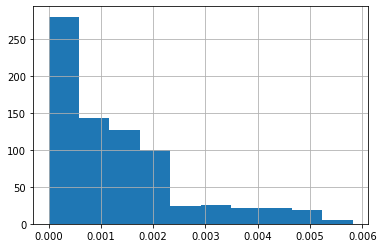

burglary
AxesSubplot(0.125,0.125;0.775x0.755)


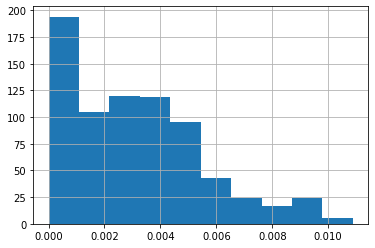

larceny
AxesSubplot(0.125,0.125;0.775x0.755)


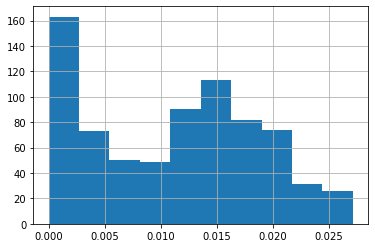

motor-vehicle-theft
AxesSubplot(0.125,0.125;0.775x0.755)


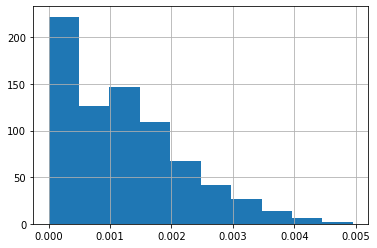

homicide
AxesSubplot(0.125,0.125;0.775x0.755)


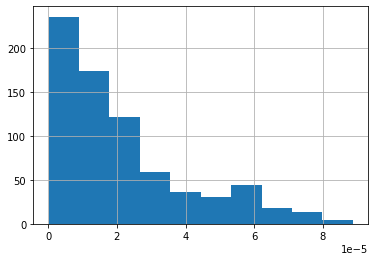

rape
AxesSubplot(0.125,0.125;0.775x0.755)


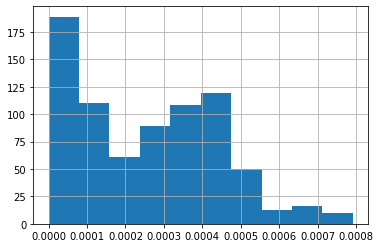

robbery
AxesSubplot(0.125,0.125;0.775x0.755)


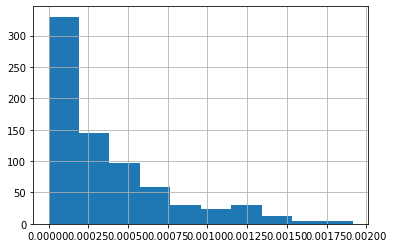

arson
AxesSubplot(0.125,0.125;0.775x0.755)


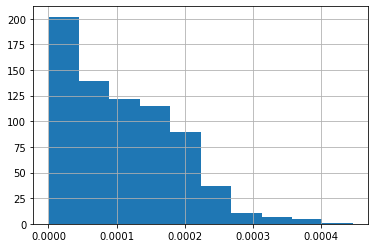

violent-crime
AxesSubplot(0.125,0.125;0.775x0.755)


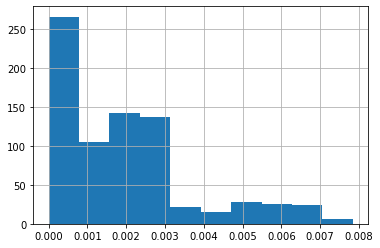

property-crime
AxesSubplot(0.125,0.125;0.775x0.755)


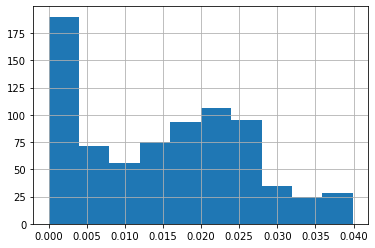

In [153]:
for offense in df['Offense Type'].unique():
    print(offense)
    print(proportion[offense].hist())
    plt.show()

In [108]:
pivot.reset_index()

Offense Type,date,state,aggravated-assault,arson,burglary,homicide,larceny,motor-vehicle-theft,property-crime,rape,robbery,violent-crime
0,1991,AL,21909.0,92.0,47915.0,434.0,107142.0,12952.0,168101.0,1423.0,5866.0,29632.0
1,1991,IA,NaN,NaN,1.0,NaN,2.0,NaN,3.0,NaN,NaN,NaN
2,1991,IL,2.0,NaN,2.0,2.0,6.0,2.0,10.0,1.0,NaN,5.0
3,1991,ND,155.0,76.0,1640.0,3.0,9074.0,625.0,11415.0,140.0,34.0,332.0
4,1991,SC,24779.0,1190.0,43161.0,379.0,103854.0,11417.0,159622.0,2600.0,5755.0,33513.0
...,...,...,...,...,...,...,...,...,...,...,...,...
790,2019,VT,904.0,49.0,1292.0,12.0,7433.0,310.0,9084.0,279.0,72.0,1267.0
791,2019,WA,13506.0,905.0,33891.0,195.0,148876.0,24892.0,208564.0,3237.0,5094.0,22032.0
792,2019,WI,9990.0,350.0,9753.0,158.0,48482.0,6514.0,65099.0,1744.0,2705.0,14597.0
793,2019,WV,3147.0,156.0,4283.0,73.0,14128.0,1758.0,20325.0,600.0,211.0,4031.0


In [112]:
pivot = pivot.reset_index()
pivot['state'] = pivot['state'].replace({"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"})

In [114]:
pivot = pivot.reset_index(drop=True)
pivot

Offense Type,date,state,aggravated-assault,arson,burglary,homicide,larceny,motor-vehicle-theft,property-crime,rape,robbery,violent-crime
0,1991,Alabama,21909.0,92.0,47915.0,434.0,107142.0,12952.0,168101.0,1423.0,5866.0,29632.0
1,1991,Iowa,NaN,NaN,1.0,NaN,2.0,NaN,3.0,NaN,NaN,NaN
2,1991,Illinois,2.0,NaN,2.0,2.0,6.0,2.0,10.0,1.0,NaN,5.0
3,1991,North Dakota,155.0,76.0,1640.0,3.0,9074.0,625.0,11415.0,140.0,34.0,332.0
4,1991,South Carolina,24779.0,1190.0,43161.0,379.0,103854.0,11417.0,159622.0,2600.0,5755.0,33513.0
...,...,...,...,...,...,...,...,...,...,...,...,...
790,2019,Vermont,904.0,49.0,1292.0,12.0,7433.0,310.0,9084.0,279.0,72.0,1267.0
791,2019,Washington,13506.0,905.0,33891.0,195.0,148876.0,24892.0,208564.0,3237.0,5094.0,22032.0
792,2019,Wisconsin,9990.0,350.0,9753.0,158.0,48482.0,6514.0,65099.0,1744.0,2705.0,14597.0
793,2019,West Virginia,3147.0,156.0,4283.0,73.0,14128.0,1758.0,20325.0,600.0,211.0,4031.0


In [115]:
pivot.to_csv('pivoted_crime.csv', index=False)

In [145]:
populations = pd.read_csv('./client/public/State Populations.csv')
populations.columns = ['state', 'population']
populations.columns

Index(['state', 'population'], dtype='object')

In [126]:
proportion = pivot.copy()

In [148]:
proportion = proportion.merge(populations, on='state')

In [151]:
for offense in df['Offense Type'].unique():
    proportion[offense] = proportion[offense]/proportion['population']

In [154]:
proportion.to_csv('crime_proportion.csv')

In [155]:
df = pd.read_csv('./client/public/us-states.csv')
df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
28334,2021-07-30,Virginia,51,694384,11532
28335,2021-07-30,Washington,53,474520,6165
28336,2021-07-30,West Virginia,54,167016,2946
28337,2021-07-30,Wisconsin,55,687382,8290


In [163]:
df[['New Cases', 'New Deaths']] = df.groupby('state')[['cases', 'deaths']].diff()

In [170]:
df = df.merge(populations, on='state')

In [173]:
df

,date,state,fips,cases,deaths,New Cases,New Deaths,population
0,2020-01-21,Washington,53,1,0,NaN,NaN,7530552
1,2020-01-22,Washington,53,1,0,0.0,0.0,7530552
2,2020-01-23,Washington,53,1,0,0.0,0.0,7530552
3,2020-01-24,Washington,53,1,0,0.0,0.0,7530552
4,2020-01-25,Washington,53,1,0,0.0,0.0,7530552
...,...,...,...,...,...,...,...,...
26332,2021-07-26,West Virginia,54,166108,2936,406.0,0.0,1803077
26333,2021-07-27,West Virginia,54,166297,2936,189.0,0.0,1803077
26334,2021-07-28,West Virginia,54,166493,2939,196.0,3.0,1803077
26335,2021-07-29,West Virginia,54,166748,2944,255.0,5.0,1803077


In [174]:
arr = ['cases', 'deaths', 'New Cases', 'New Deaths']
for column in arr:
    df[column] = df[column]/df['population']
# df[] = df[['cases', 'deaths', 'New Cases', 'New Deaths']]/df['population']

In [175]:
df

,date,state,fips,cases,deaths,New Cases,New Deaths,population
0,2020-01-21,Washington,53,1.327924e-07,0.000000,NaN,NaN,7530552
1,2020-01-22,Washington,53,1.327924e-07,0.000000,0.000000,0.000000,7530552
2,2020-01-23,Washington,53,1.327924e-07,0.000000,0.000000,0.000000,7530552
3,2020-01-24,Washington,53,1.327924e-07,0.000000,0.000000,0.000000,7530552
4,2020-01-25,Washington,53,1.327924e-07,0.000000,0.000000,0.000000,7530552
...,...,...,...,...,...,...,...,...
26332,2021-07-26,West Virginia,54,9.212474e-02,0.001628,0.000225,0.000000,1803077
26333,2021-07-27,West Virginia,54,9.222956e-02,0.001628,0.000105,0.000000,1803077
26334,2021-07-28,West Virginia,54,9.233826e-02,0.001630,0.000109,0.000002,1803077
26335,2021-07-29,West Virginia,54,9.247969e-02,0.001633,0.000141,0.000003,1803077


In [180]:
df.to_csv('US-states.csv')

<AxesSubplot:>

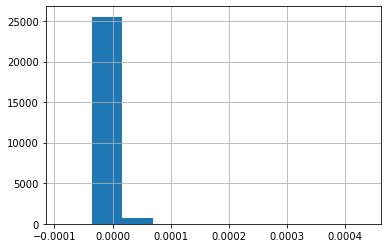

In [183]:
df['New Deaths'].hist()